In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy
from scipy import stats
import scipy.stats as stats
from scipy.stats import ttest_ind
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway


In [7]:
genetic = pd.read_csv('data/family_history_rare_disease_cleaned.csv')

In [8]:
genetic.head(10)

,Patient ID,Age,Gender,Parental History,Sibling History,Number of Relatives with Disease,Known Genetic Mutation,Early Onset Cases in Family,Environmental Risk Exposure,geneticTest
0,PT0001,56,Male,No,No,1,No,No,Low,N
1,PT0002,69,Female,Yes,No,1,No,No,Low,P
2,PT0003,46,Male,No,No,2,No,No,Low,P
3,PT0004,32,Female,Yes,No,3,Yes,Yes,Moderate,N
4,PT0005,60,Female,Yes,No,1,No,No,Moderate,N
5,PT0006,25,Male,No,No,1,No,No,Moderate,N
6,PT0007,78,Male,No,No,3,No,No,Low,N
7,PT0008,38,Male,No,No,4,No,No,High,N
8,PT0009,56,Male,No,No,3,Yes,No,High,P
9,PT0010,75,Male,No,No,2,No,No,High,P


In [9]:
genetic.describe()

,Age,Number of Relatives with Disease
count,1000.000000,1000.00000
mean,49.857000,2.05500
std,18.114267,1.39783
min,18.000000,0.00000
25%,35.000000,1.00000
50%,50.000000,2.00000
75%,66.000000,3.00000
max,79.000000,4.00000


In [10]:
genetic.columns

Index(['Patient ID', 'Age', 'Gender', 'Parental History', 'Sibling History',
       'Number of Relatives with Disease', 'Known Genetic Mutation',
       'Early Onset Cases in Family', 'Environmental Risk Exposure',
       'geneticTest'],
      dtype='object')

In [11]:
genetic.nunique()

,0
Patient ID,1000
Age,62
Gender,3
Parental History,2
Sibling History,2
Number of Relatives with Disease,5
Known Genetic Mutation,2
Early Onset Cases in Family,2
Environmental Risk Exposure,3
geneticTest,2


In [12]:
genetic["Gender"].unique()


array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
genetic.shape

(1000, 10)

In [14]:
genetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Patient ID                        1000 non-null   object
 1   Age                               1000 non-null   int64 
 2   Gender                            1000 non-null   object
 3   Parental History                  1000 non-null   object
 4   Sibling History                   1000 non-null   object
 5   Number of Relatives with Disease  1000 non-null   int64 
 6   Known Genetic Mutation            1000 non-null   object
 7   Early Onset Cases in Family       1000 non-null   object
 8   Environmental Risk Exposure       1000 non-null   object
 9   geneticTest                       1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


In [15]:
#The dataset contains family health records used to analyze the presence of rare diseases across generations."

In [16]:
# Copy
genetic_clean = genetic.copy()

# Binary columns with Yes/No, Y/N or P/N values
binary_cols = [
    "Gender", "Parental History", "Sibling History",
    "Known Genetic Mutation", "Early Onset Cases in Family",
    "geneticTest"
]

# Multi-category columns
multi_cat_cols = ["Environmental Risk Exposure"]

# Cleaning: removing extra spaces
for col in binary_cols + multi_cat_cols:
    genetic_clean[col] = genetic_clean[col].astype(str).str.strip()

# Mapping for binary-type columns
binary_mapping = {
    "Yes": 1, "No": 0,
    "Y": 1,  "N": 0,
    "P": 1,  # genetic test positive
    # Gender
    "Male": 1, "Female": 0, "Other": 2
}

for col in binary_cols:
    genetic_clean[col] = genetic_clean[col].map(binary_mapping)

# Mapping for multi-category column
multi_mapping = {
    "Low": 0,
    "Moderate": 1,
    "High": 2
}

for col in multi_cat_cols:
    genetic_clean[col] = genetic_clean[col].map(multi_mapping)

# Optional: Warn if unmapped values exist
for col in binary_cols + multi_cat_cols:
    if genetic_clean[col].isna().any():
        print(f"⚠️ Warning: Unmapped values detected in column '{col}'")

# Check
print(genetic_clean.head())
print(genetic_clean.info())




  Patient ID  Age  Gender  Parental History  Sibling History  \
0     PT0001   56       1                 0                0   
1     PT0002   69       0                 1                0   
2     PT0003   46       1                 0                0   
3     PT0004   32       0                 1                0   
4     PT0005   60       0                 1                0   

   Number of Relatives with Disease  Known Genetic Mutation  \
0                                 1                       0   
1                                 1                       0   
2                                 2                       0   
3                                 3                       1   
4                                 1                       0   

   Early Onset Cases in Family  Environmental Risk Exposure  geneticTest  
0                            0                            0            0  
1                            0                            0            1  
2          

In [17]:
genetic_clean.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
Parental History,0
Sibling History,0
Number of Relatives with Disease,0
Known Genetic Mutation,0
Early Onset Cases in Family,0
Environmental Risk Exposure,0
geneticTest,0


In [18]:
#The data was cleaned by removing duplicates and handling missing values.
#The dataset contains demographic, genetic, and family history information

In [19]:
##Statistical Analysis

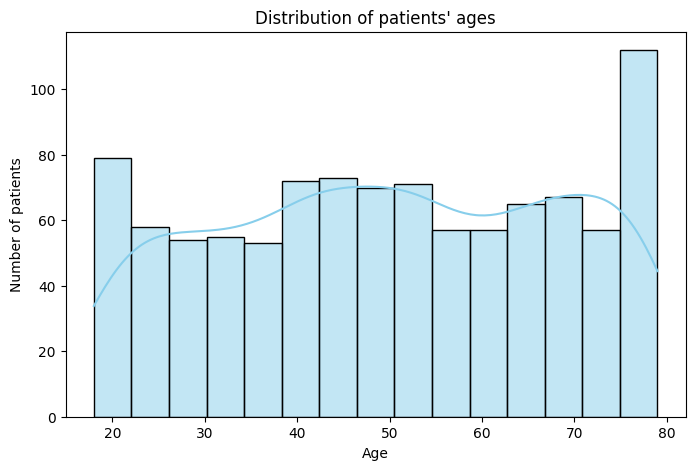

The most frequent age is: 79 years.


In [20]:
# distribution by age


plt.figure(figsize=(8,5))
sns.histplot(genetic_clean['Age'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of patients' ages")
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.show()

age_mode = genetic_clean['Age'].mode()[0]
print(f"The most frequent age is: {age_mode} years.")


/tmp/ipython-input-3550322213.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=genetic_clean, palette='pastel')


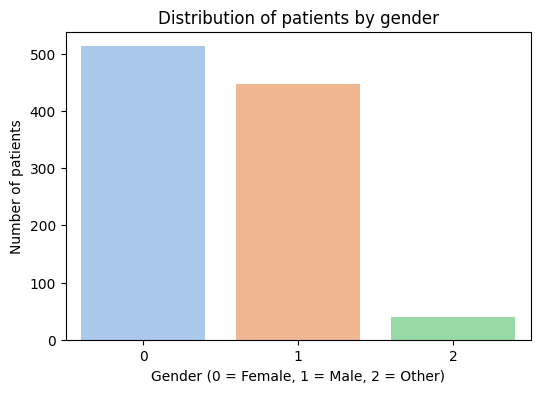

Distribution by gender:
  Female: 513 patients
  Male: 447 patients
  Other: 40 patients


In [21]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=genetic_clean, palette='pastel')
plt.title("Distribution of patients by gender")
plt.xlabel("Gender (0 = Female, 1 = Male, 2 = Other)")
plt.ylabel("Number of patients")
plt.show()

gender_counts = genetic_clean['Gender'].value_counts()
print("Distribution by gender:")
for g, count in gender_counts.items():
    if g == 0:
        label = "Female"
    elif g == 1:
        label = "Male"
    else:
        label = "Other"
    print(f"  {label}: {count} patients")


/tmp/ipython-input-1507061949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Known Genetic Mutation', data=genetic_clean, palette='Set2')


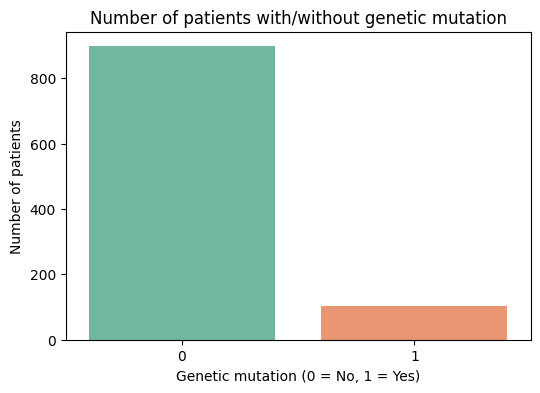

Number of patients with genetic mutation: 103
Number of patients without genetic mutation: 897


In [22]:
# Genetic mutation vs patients
plt.figure(figsize=(6,4))
sns.countplot(x='Known Genetic Mutation', data=genetic_clean, palette='Set2')
plt.title("Number of patients with/without genetic mutation")
plt.xlabel("Genetic mutation (0 = No, 1 = Yes)")
plt.ylabel("Number of patients")
plt.show()
# patients seen in genetics do not often have an identified mutation

mutation_counts = genetic_clean['Known Genetic Mutation'].value_counts()
patients_with_mutation = mutation_counts.get(1, 0)
patients_without_mutation = mutation_counts.get(0, 0)
print(f"Number of patients with genetic mutation: {patients_with_mutation}")
print(f"Number of patients without genetic mutation: {patients_without_mutation}")


/tmp/ipython-input-2518482727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Environmental Risk Exposure', data=genetic_clean, palette='coolwarm')


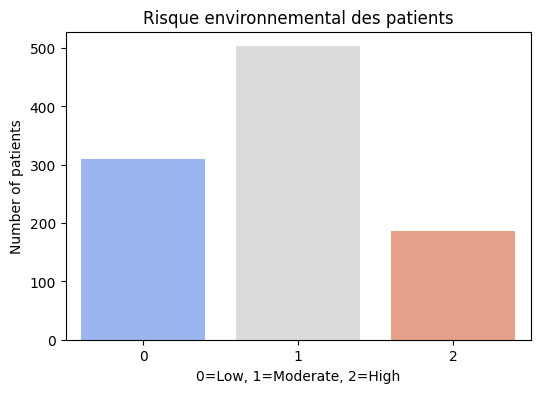

Distribution of environmental risk exposure:
  Moderate: 503 patients
  Low: 310 patients
  High: 187 patients


In [23]:
# Risque environnemental
plt.figure(figsize=(6,4))
sns.countplot(x='Environmental Risk Exposure', data=genetic_clean, palette='coolwarm')
plt.title("Risque environnemental des patients")
plt.xlabel("0=Low, 1=Moderate, 2=High")
plt.ylabel("Number of patients")
plt.show()
# le risque environnmental ne semble pas elevée

risk_counts = genetic_clean['Environmental Risk Exposure'].value_counts()
risk_labels = {0: "Low", 1: "Moderate", 2: "High"}
print("Distribution of environmental risk exposure:")
for r, count in risk_counts.items():
    print(f"  {risk_labels[r]}: {count} patients")


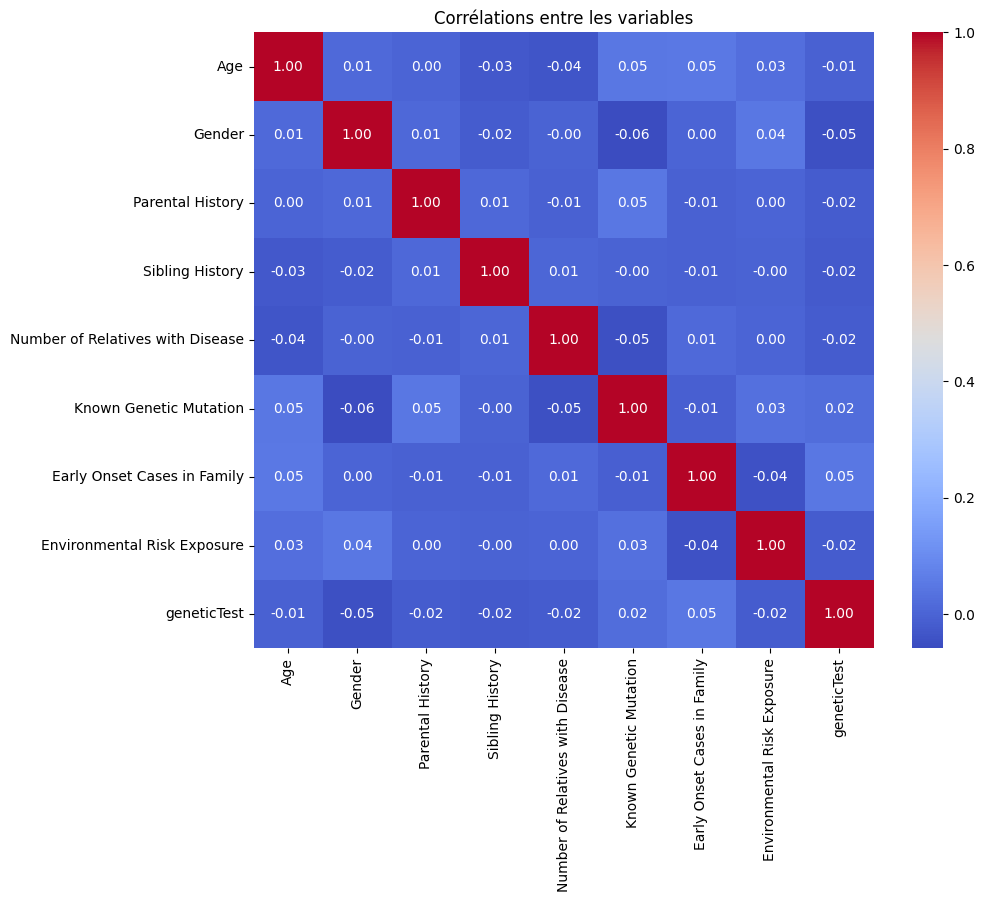

The strongest positive correlation is between 'Age' and 'Early Onset Cases in Family', with a correlation of 0.05.
The strongest negative correlation is between 'Gender' and 'Known Genetic Mutation', with a correlation of -0.06.


In [24]:
plt.figure(figsize=(10,8))
corr = genetic_clean.drop(columns=["Patient ID"]).corr()  # On retire l'ID
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre les variables")
plt.show()


# Find the pair with the strongest positive correlation
corr_pos = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # upper triangle only
max_corr = corr_pos.stack().idxmax()
max_value = corr_pos.stack().max()

# Find the pair with the strongest negative correlation
min_corr = corr_pos.stack().idxmin()
min_value = corr_pos.stack().min()

# Print conclusions
print(f"The strongest positive correlation is between '{max_corr[0]}' and '{max_corr[1]}', with a correlation of {max_value:.2f}.")
print(f"The strongest negative correlation is between '{min_corr[0]}' and '{min_corr[1]}', with a correlation of {min_value:.2f}.")



In [25]:
#Simple correlations do not produce a clear pattern.

#The next interesting step is to test categorical relationships with Chi-squared or ANOVA to discover more significant associations.


In [26]:
# contingency table
contingency = pd.crosstab(genetic_clean['Parental History'], genetic_clean['Known Genetic Mutation'])
print("Contingency Table:")
print(contingency)

#  test Chi-squared
chi2, p, dof, expected = chi2_contingency(contingency)

# Result
print(f"\nChi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

# Conclusion
if p < 0.05:
    print("\nConclusion: There is a significant association between Parental History and Known Genetic Mutation (p < 0.05).")
else:
    print("\nConclusion: No significant association between Parental History and Known Genetic Mutation (p ≥ 0.05).")


Contingency Table:
Known Genetic Mutation    0   1
Parental History               
0                       623  64
1                       274  39

Chi-squared statistic: 1.97
P-value: 0.1601
Degrees of freedom: 1

Expected frequencies:
Known Genetic Mutation        0       1
Parental History                       
0                       616.239  70.761
1                       280.761  32.239

Conclusion: No significant association between Parental History and Known Genetic Mutation (p ≥ 0.05).


In [27]:
#Having or not having a family history in the parents does not appear to influence the presence of a genetic mutation.

In [28]:
#Sibling History vs geneticTest

In [29]:
# contingency table
contingency = pd.crosstab(genetic_clean['Sibling History'], genetic_clean['geneticTest'])
print("Contingency Table:")
print(contingency)

# test Chi-squared
chi2, p, dof, expected = chi2_contingency(contingency)

# Result
print(f"\nChi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

# Conclusion
if p < 0.05:
    print("\nConclusion: There is a significant association between Sibling History and geneticTest (p < 0.05).")
else:
    print("\nConclusion: No significant association between Sibling History and geneticTest (p ≥ 0.05).")


Contingency Table:
geneticTest        0    1
Sibling History          
0                662  170
1                138   30

Chi-squared statistic: 0.43
P-value: 0.5121
Degrees of freedom: 1

Expected frequencies:
geneticTest          0      1
Sibling History              
0                665.6  166.4
1                134.4   33.6

Conclusion: No significant association between Sibling History and geneticTest (p ≥ 0.05).


In [30]:
#Whether or not a patient has a family history of the condition in their siblings does not significantly influence the likelihood that they have undergone genetic testing.

In [31]:
##Comparison by Genetic Mutation

#  groups in Known Genetic Mutation
group0 = genetic_clean[genetic_clean['Known Genetic Mutation'] == 0]['Number of Relatives with Disease']
group1 = genetic_clean[genetic_clean['Known Genetic Mutation'] == 1]['Number of Relatives with Disease']

# t-test
t_stat, p_value = ttest_ind(group0, group1, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Conclusion: The number of relatives with disease is significantly different between patients with and without genetic mutation (p < 0.05).")
else:
    print("Conclusion: No significant difference in the number of relatives with disease between patients with and without genetic mutation (p ≥ 0.05).")


T-statistic: 1.61, P-value: 0.1108
Conclusion: No significant difference in the number of relatives with disease between patients with and without genetic mutation (p ≥ 0.05).


In [32]:
#Our analysis shows that the presence of a known genetic mutation does not significantly impact the number of affected relatives in the family.”

In [33]:
#Comparison by Environmental Risk Exposure (ANOVA)



# groups Environmental Risk Exposure
group_low = genetic_clean[genetic_clean['Environmental Risk Exposure'] == 0]['Number of Relatives with Disease']
group_moderate = genetic_clean[genetic_clean['Environmental Risk Exposure'] == 1]['Number of Relatives with Disease']
group_high = genetic_clean[genetic_clean['Environmental Risk Exposure'] == 2]['Number of Relatives with Disease']

# ANOVA
f_stat, p_value_anova = f_oneway(group_low, group_moderate, group_high)
print(f"F-statistic: {f_stat:.2f}, P-value: {p_value_anova:.4f}")

# Conclusion
if p_value_anova < 0.05:
    print("Conclusion: The number of relatives with disease differs significantly across environmental risk levels (p < 0.05).")
else:
    print("Conclusion: No significant difference in the number of relatives with disease across environmental risk levels (p ≥ 0.05).")


F-statistic: 0.65, P-value: 0.5232
Conclusion: No significant difference in the number of relatives with disease across environmental risk levels (p ≥ 0.05).


In [34]:
#Parental history vs genetic test

# Contingency table
contingency = pd.crosstab(genetic_clean['Parental History'], genetic_clean['geneticTest'])
print("Contingency Table:")
print(contingency)

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"\nChi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("\nExpected frequencies:")
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))

# Conclusion
if p < 0.05:
    print("\nConclusion: There is a significant association between Parental History and geneticTest (p < 0.05).")
else:
    print("\nConclusion: No significant association between Parental History and geneticTest (p ≥ 0.05).")


Contingency Table:
geneticTest         0    1
Parental History          
0                 546  141
1                 254   59

Chi-squared statistic: 0.28
P-value: 0.5971
Degrees of freedom: 1

Expected frequencies:
geneticTest           0      1
Parental History              
0                 549.6  137.4
1                 250.4   62.6

Conclusion: No significant association between Parental History and geneticTest (p ≥ 0.05).


No significant relationships were detected between genetic mutations, family history, gender, environmental risk, and genetic testing, indicating complex patterns in rare disease inheritance

In [40]:

def generate_recommendations():

    print(" Nombre de lignes :", len(genetic_clean))
    print(" Colonnes :", genetic_clean.columns)

    def risk(row):
        if (row['Parental History']==1 or row['Sibling History']==1) and row['Environmental Risk Exposure']==2 :
            return "High risk: recommend genetic testing"
        elif (row['Parental History']==1 or row['Sibling History']==1):
            return "Moderate risk: monitor patient"
        else:
            return "Low risk: standard follow-up"

    genetic_clean['Recommendation'] = genetic_clean.apply(risk, axis=1)

    print("\n=== Sample Recommendations ===")
    print(genetic_clean[['Patient ID','Recommendation']].head(10))


generate_recommendations()


 Nombre de lignes : 1000
 Colonnes : Index(['Patient ID', 'Age', 'Gender', 'Parental History', 'Sibling History',
       'Number of Relatives with Disease', 'Known Genetic Mutation',
       'Early Onset Cases in Family', 'Environmental Risk Exposure',
       'geneticTest'],
      dtype='object')

=== Sample Recommendations ===
  Patient ID                  Recommendation
0     PT0001    Low risk: standard follow-up
1     PT0002  Moderate risk: monitor patient
2     PT0003    Low risk: standard follow-up
3     PT0004  Moderate risk: monitor patient
4     PT0005  Moderate risk: monitor patient
5     PT0006    Low risk: standard follow-up
6     PT0007    Low risk: standard follow-up
7     PT0008    Low risk: standard follow-up
8     PT0009    Low risk: standard follow-up
9     PT0010    Low risk: standard follow-up


In [41]:
print(genetic_clean[['Patient ID','Recommendation']])


    Patient ID                  Recommendation
0       PT0001    Low risk: standard follow-up
1       PT0002  Moderate risk: monitor patient
2       PT0003    Low risk: standard follow-up
3       PT0004  Moderate risk: monitor patient
4       PT0005  Moderate risk: monitor patient
..         ...                             ...
995     PT0996  Moderate risk: monitor patient
996     PT0997    Low risk: standard follow-up
997     PT0998    Low risk: standard follow-up
998     PT0999    Low risk: standard follow-up
999     PT1000  Moderate risk: monitor patient

[1000 rows x 2 columns]


In [42]:
print(genetic_clean['Recommendation'].value_counts())


Recommendation
Low risk: standard follow-up            573
Moderate risk: monitor patient          343
High risk: recommend genetic testing     84
Name: count, dtype: int64


<Axes: title={'center': 'Risk distribution'}, xlabel='Recommendation'>

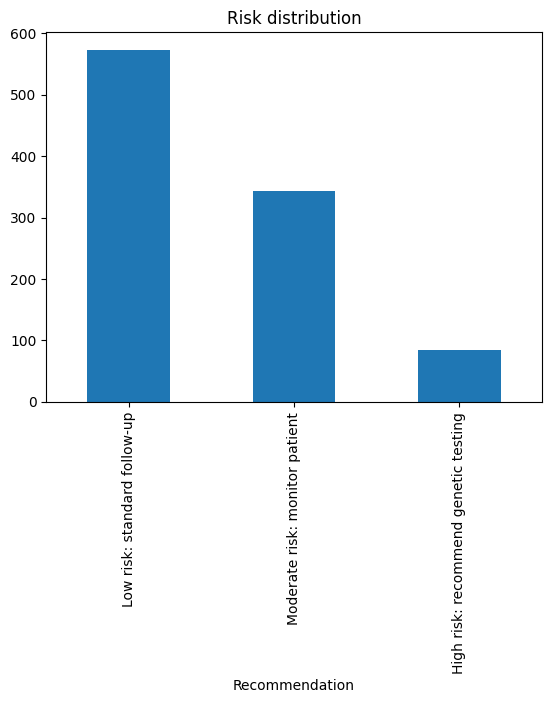

In [43]:
genetic_clean['Recommendation'].value_counts().plot(kind='bar', title="Risk distribution")
